# Лабораторная работа №3. Синтез БИХ-фильтров.
Курс: лаборатория цифровой обработки сигналов, ФРКТ МФТИ
# Модуль 3. Метод инвариантной импульсной характеристики.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
#%matplotlib inline
%matplotlib notebook

Метод инвариантной импульсной характеристики относится к методам синтеза БИХ-фильтров на основе аналогового фильтра-прототипа. 

Он заключается в том, что импульсная характеристика аналогового фильтра ${{h}_{a}}(t)$ (реакция на дельта-функцию) дискретизуется с шагом $\Delta t$, в результате чего получается импульсная характеристика цифрового фильтра: $h[k]=\Delta t\ {{h}_{a}}(k\Delta t)$ 
 
Пусть $H(f)$ – частотная характеристика цифрового фильтра, ${{H}_{a}}(f)$– аналогового. Тогда в силу $h[k]=\Delta t\ {{h}_{a}}(k\Delta t)$ справедливо соотношение
$$H(f)=\sum\limits_{m=-\infty }^{\infty }{\ {{H}_{a}}}(f+m{{f}_{\text{д}}}).$$
При этом появляется эффект наложения (элайзинг/алиасинг).


## Пример. Синтез на основе интегрирующей RC-цепи

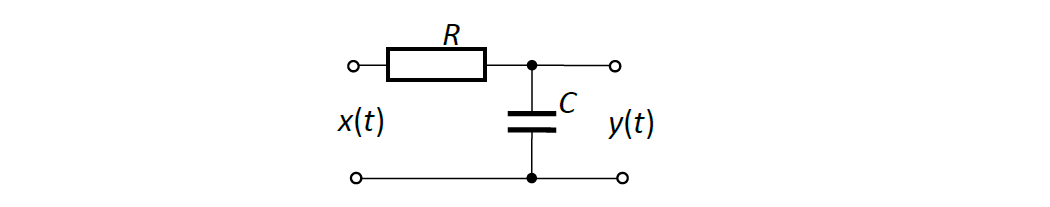

Ток, текущий через резистор, выражается через изменение напряжения на конденсаторе как 
$$i\left( t \right)\text{=}C\frac{dy(t)}{dt}.$$ 
Из закона Ома $$i(t)R\text{+ }y\left( t \right)=x\left( t \right).$$
$$RC\frac{dy(t)}{dt}\text{+ }y\left( t \right)=x\left( t \right).$$
Пусть $x(t)\overset{L}{\longleftrightarrow}X(p)$, $y(t)\overset{L}{\longleftrightarrow}Y(p)$. Тогда по свойствам преобразования Лапласа
$$\frac{dy(t)}{dt}\overset{L}{\longleftrightarrow}pY(p)-y(0)$$
Пусть в начальный момент времени $y(0)=0$. 
$$RCpY(p)+Y(p)=X(p).$$


Тогда передаточная функция аналогового фильтра имеет вид

$${{H}_{a}}(p)=\frac{Y(p)}{X(p)}=\frac{1}{1+RCp}=\frac{1}{RC\left( p+\frac{1}{RC} \right)}.$$

In [25]:
RC=2*1e-4 # постоянная времени RC цепи

In [26]:
lti_RC=signal.lti([1], [RC, 1])
lti_RC

TransferFunctionContinuous(
array([5000.]),
array([1.e+00, 5.e+03]),
dt: None
)

In [27]:
signal.ZerosPolesGain(lti_RC)

ZerosPolesGainContinuous(
array([], dtype=float64),
array([-5000.]),
5000.0,
dt: None
)

Для аналогового фильтра импульсная характеристика может быть найдена с помощью обратного преобразования Лапласа для передаточной функции ${{H}_{a}}(p)$: 
$${{h}_{a}}(t)=\frac{1}{j2\pi }\oint\limits_{C}{{{H}_{a}}(p){{e}^{pt}}dp}=\underset{-1/RC}{\mathop{\text{Res}}}\,\frac{{{e}^{pt}}}{RC\left( p+\frac{1}{RC} \right)}=\frac{1}{RC}\exp \left( -\frac{t}{RC} \right),\,t\ge 0.$$


<IPython.core.display.Javascript object>


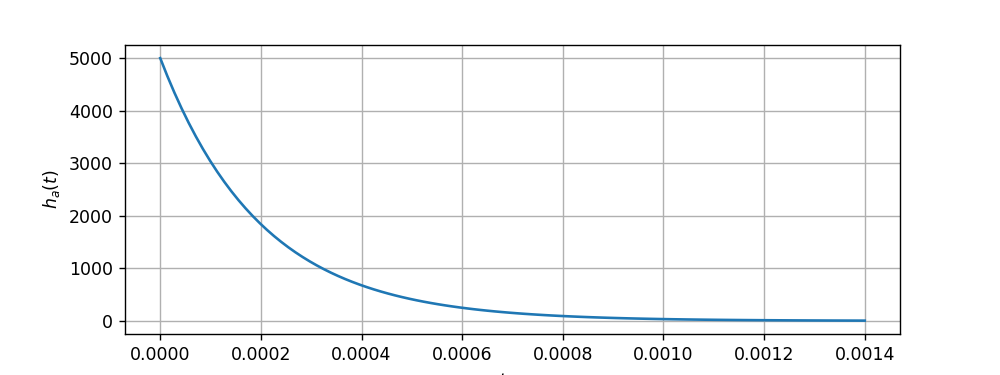

In [28]:
t, h_a = signal.impulse(lti_RC) # импульсная характеристика аналогового фильтра
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(t, h_a)
plt.xlabel("$t$, c")
plt.ylabel("$h_a(t)$")
plt.grid()

Частота среза RC-цепочки интегрирующего типа $f_c=\dfrac{1}{2\pi RC}$

In [29]:
1/(2*np.pi*RC) # Численное значение в Гц

795.7747154594767

In [30]:
w, H_a=signal.freqresp(lti_RC, w=np.linspace(-2*np.pi*3/(2*np.pi*RC), 2*np.pi*3/(2*np.pi*RC), 1024))

<IPython.core.display.Javascript object>


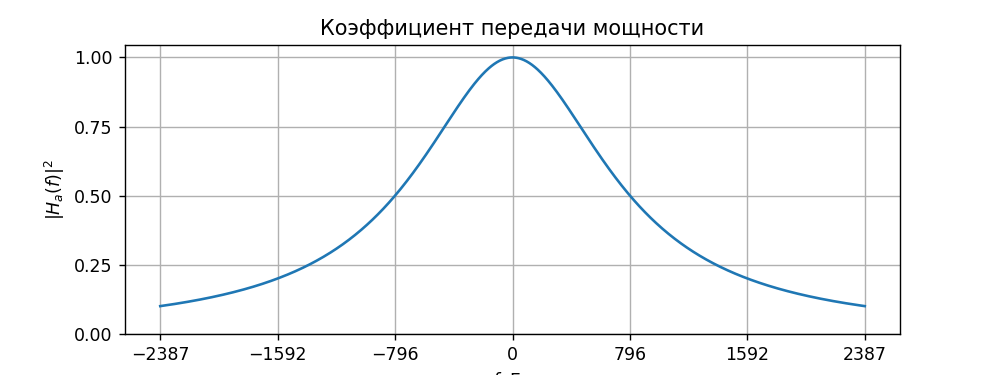

In [31]:
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(w/(2*np.pi), abs(H_a)**2)
plt.xlabel("$f$, Гц")
plt.ylabel("$|H_a(f)|^2$")
plt.title("Коэффициент передачи мощности")
plt.xticks([u/(2*np.pi*RC) for u in range(-3, 4, 1)])
plt.yticks(np.linspace(0, 1, 5))
plt.grid()

$$\dfrac{1}{\sqrt2}\approx 0,707$$

<IPython.core.display.Javascript object>


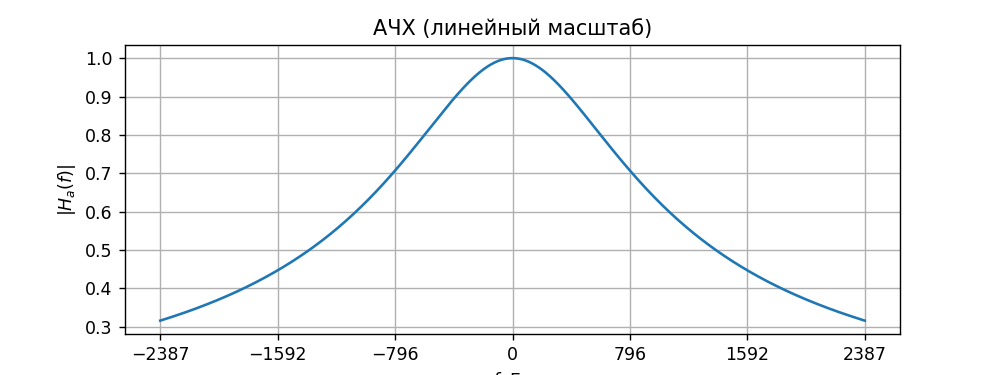

In [33]:
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(w/(2*np.pi), abs(H_a))
plt.xlabel("$f$, Гц")
plt.ylabel("$|H_a(f)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xticks([u/(2*np.pi*RC) for u in range(-3, 4, 1)])
plt.grid()

Для характеристик в дБ   

$20\log_{10}|H(f)|=10\log_{10}|H(f)|^2$

In [34]:
10*np.log10(0.5)

-3.010299956639812

In [35]:
20*np.log10(1/np.sqrt(2))

-3.0102999566398125

$10\log_{10}0.5\approx 20\log_{10} 0,707 \approx -3$ (дБ)

<IPython.core.display.Javascript object>


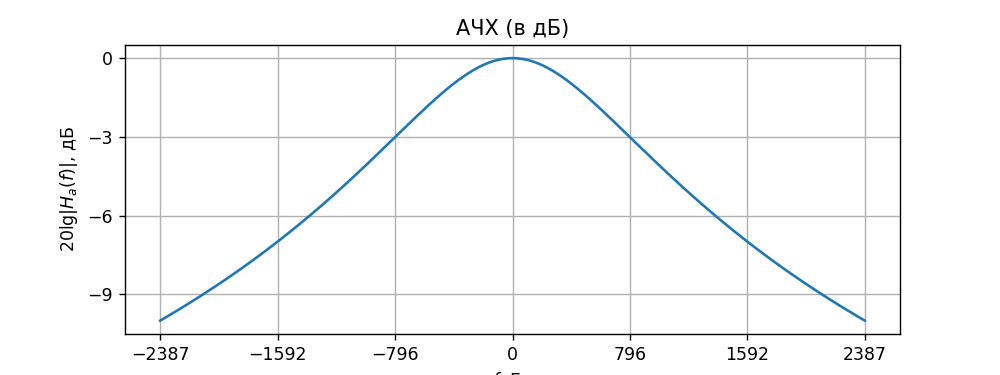

In [36]:
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(w/(2*np.pi), 20*np.log10(abs(H_a)))
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg |H_a(f)|$, дБ")
plt.title("АЧХ (в дБ)")
plt.xticks([u/(2*np.pi*RC) for u in range(-3, 4, 1)])
plt.yticks(np.linspace(-9, 0, 4))
plt.grid()

$${{H}_{a}}(p)=\frac{Y(p)}{X(p)}=\frac{1}{1+RCp}=\frac{1}{RC\left( p+\frac{1}{RC} \right)}.$$

Дискретизуем импульсную характеристику 
$${{h}_{a}}(t)=\frac{1}{RC}\exp \left( -\frac{t}{RC} \right),\,t\ge 0.$$
с шагом $\Delta t$ так, что
$$h[k]=\Delta t\,{{h}_{a}}(k\Delta t).$$

$$h[k]=\frac{\Delta t}{RC}\exp \left( -\frac{k\Delta t}{RC} \right),\text{ }k\ge 0.$$

$\text{ }\!\!~\!\!\text{ }H(z)\text{ }\!\!~\!\!\text{ }=\text{ }\!\!~\!\!\text{ }\sum\limits_{k=0}^{\infty }{\text{ }\!\!~\!\!\text{ }}h[k]\text{ }\!\!~\!\!\text{ }{{z}^{-k}}=\dfrac{\Delta t}{RC}\text{ }\!\!~\!\!\text{ }\sum\limits_{k=0}^{\infty }{\text{ }\!\!~\!\!\text{ }}\exp \left( -\dfrac{k\Delta t}{RC} \right){{z}^{-k}}=\dfrac{\Delta t}{RC}\sum\limits_{k=0}^{\infty }{\text{ }\!\!~\!\!\text{ }}{{\left( \exp \left( -\dfrac{\Delta t}{RC} \right){{z}^{-1}} \right)}^{k}}=\dfrac{\dfrac{\Delta t}{RC}}{1-\exp \left( -\dfrac{\Delta t}{RC} \right){{z}^{-1}}}$

$$y[k]=\frac{\Delta t}{RC}x[k]+\exp \left( -\frac{\Delta t}{RC} \right)y[k-1]$$

In [37]:
dt=RC/8
dt

2.5e-05

In [38]:
beta=[dt/RC, 0]
alpha=[1, -np.exp(-dt/RC)]
dlti_RC=signal.dlti(beta, alpha, dt=dt)
dlti_RC

TransferFunctionDiscrete(
array([0.125, 0.   ]),
array([ 1.       , -0.8824969]),
dt: 2.5e-05
)

In [39]:
signal.ZerosPolesGain(dlti_RC)

ZerosPolesGainDiscrete(
array([0.]),
array([0.8824969]),
0.125,
dt: 2.5e-05
)

<IPython.core.display.Javascript object>


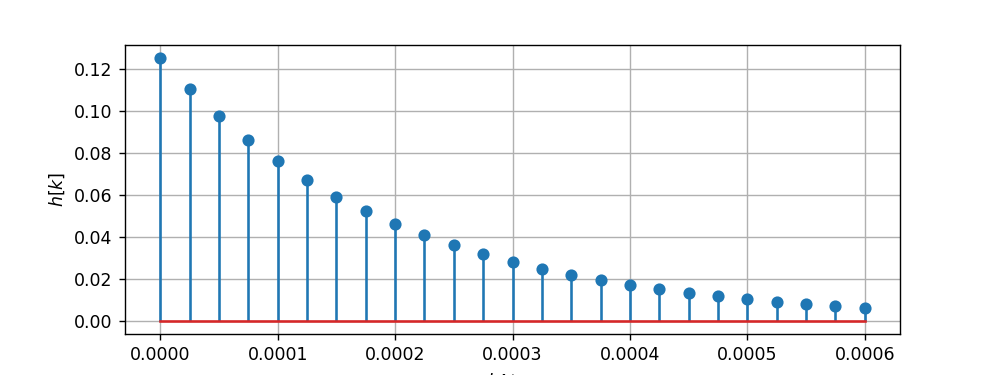

In [40]:
plt.figure(figsize=[8, 3], dpi=100)
t, h = signal.dimpulse(dlti_RC, n=25)
plt.stem(t, np.squeeze(h))
plt.xlabel("$k\Delta t$, c")
plt.ylabel("$h[k]$")
plt.grid()

<IPython.core.display.Javascript object>


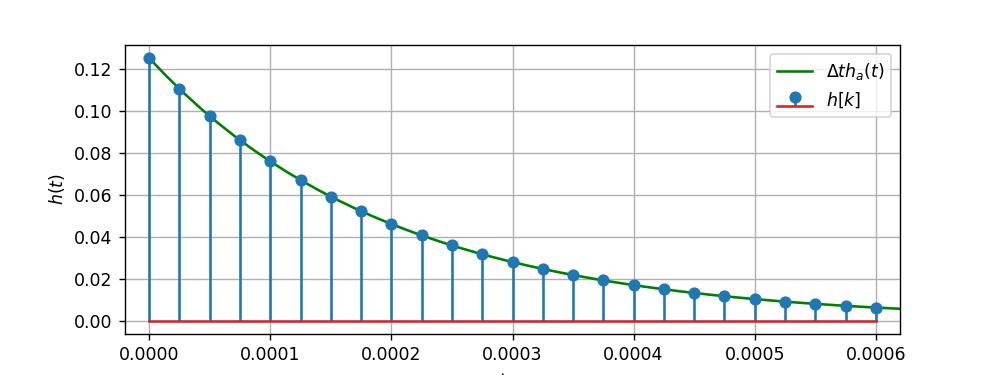

In [41]:
plt.figure(figsize=[8, 3], dpi=100)
t, h_a = signal.impulse(lti_RC)
plt.plot(t, dt*h_a, 'g', label="$\\Delta t h_a(t)$")

t, h = signal.dimpulse(dlti_RC, n=25)
plt.stem(t, np.squeeze(h), label="$h[k]$")

plt.legend()
plt.xlim([-0.00002, 0.00062])
plt.xlabel("$t$, c")
plt.ylabel("$h(t)$")
plt.grid()

In [42]:
1/(2*dt)

20000.0

In [43]:
w_a, H_a=signal.freqresp(lti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024)/dt)

In [44]:
theta_d, H_d=signal.dfreqresp(dlti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024))

<IPython.core.display.Javascript object>


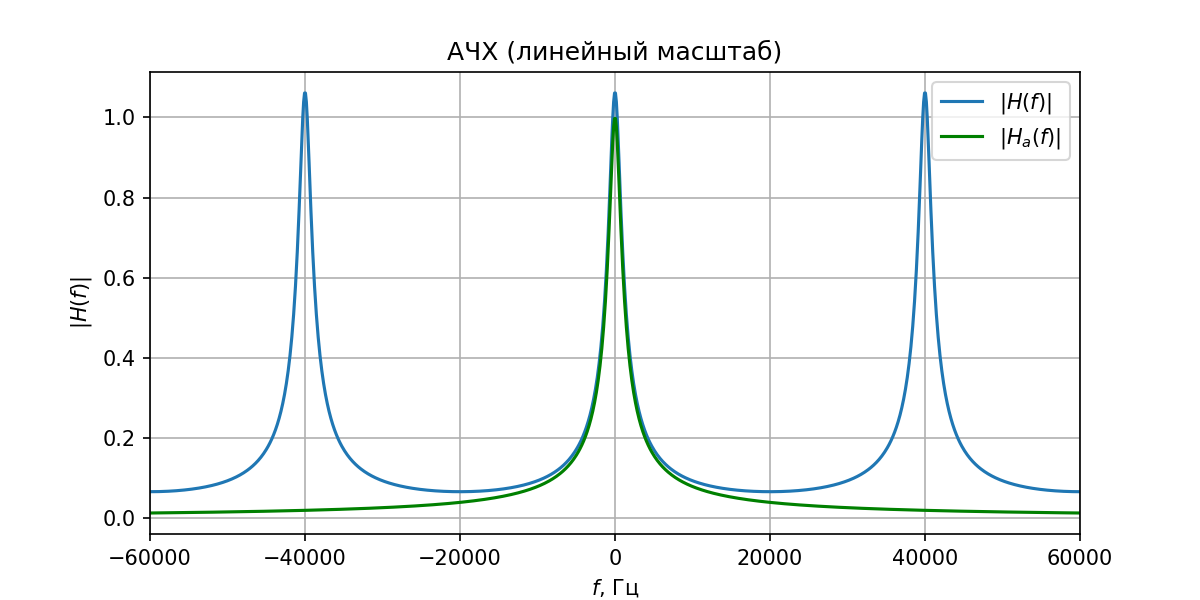

In [45]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), abs(H_d), label="$|H(f)|$")
plt.plot(w_a/(2*np.pi), abs(H_a), "g", label="$|H_a(f)|$")
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-1.5/dt, 1.5/dt])
plt.legend(loc='upper right')
plt.grid()
plt.savefig("imp_inv.svg")

АЧХ цифрового фильтра и аналогового на интервале $[-f_д /2; f_д /2]$ незначительно отличаются и это отличие вызвано эффектом наложения отдельных копий АЧХ аналогового сигнала, сдвинутых на $f_д$.

<IPython.core.display.Javascript object>


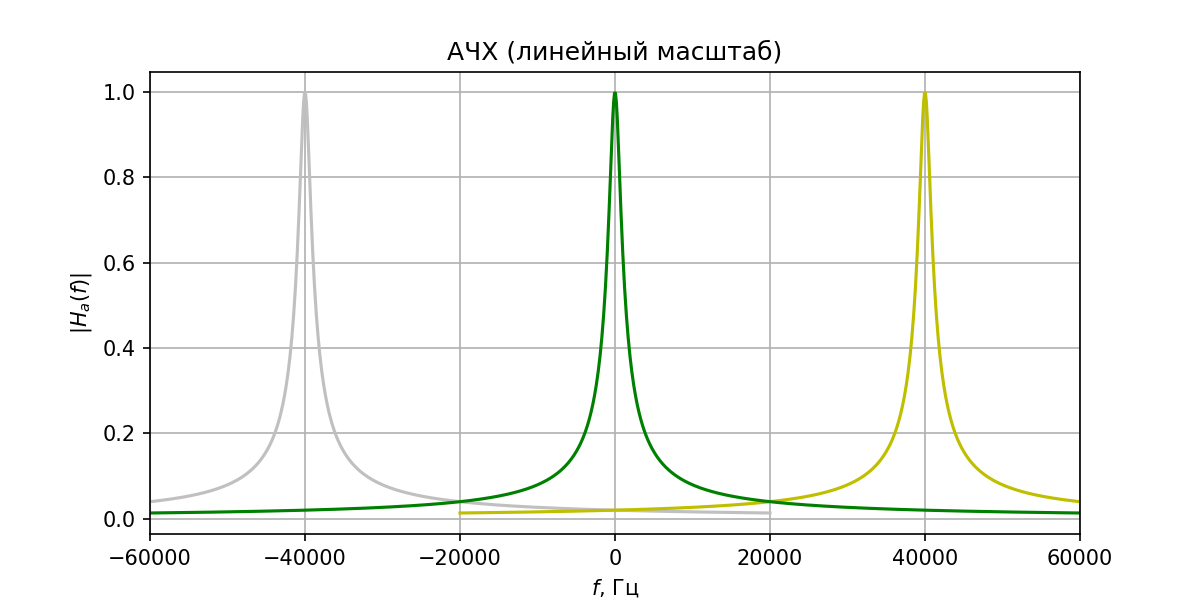

In [46]:
plt.figure(figsize=[8, 4], dpi=120)
#plt.plot(theta_d/(2*np.pi*dt), abs(H_d))
plt.plot(w_a/(2*np.pi)-(1/dt), abs(H_a), "silver")
plt.plot(w_a/(2*np.pi)+(1/dt), abs(H_a), "y")
plt.plot(w_a/(2*np.pi), abs(H_a), "g")
plt.xlabel("$f$, Гц")
plt.ylabel("$|H_a(f)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-1.5/dt, 1.5/dt])
plt.grid()

<IPython.core.display.Javascript object>


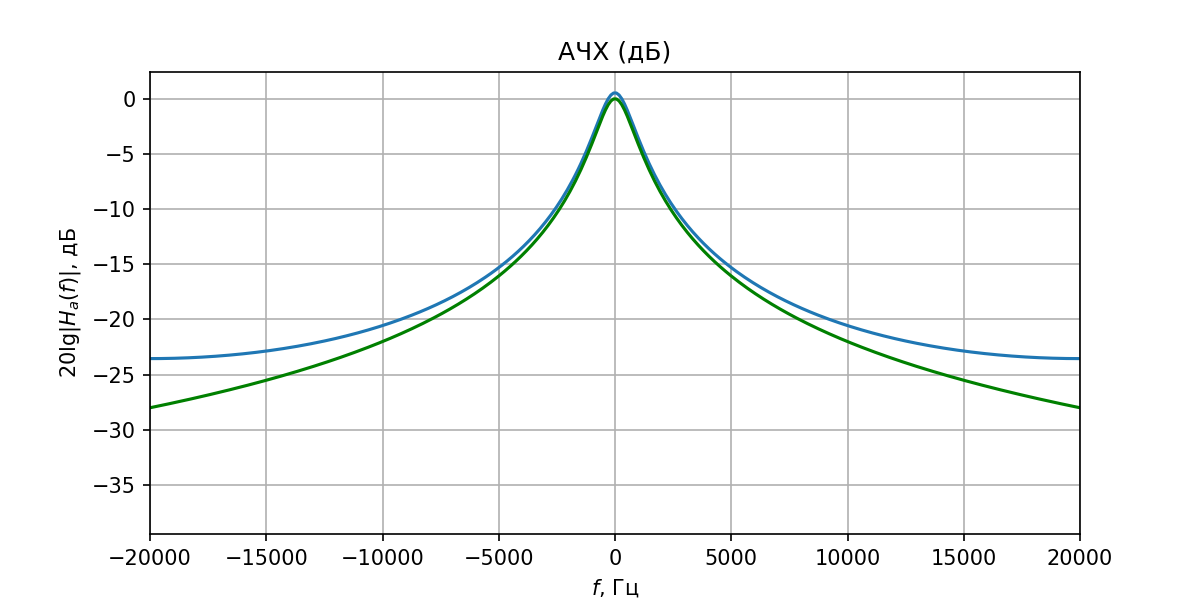

In [47]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), 20*np.log10(abs(H_d)))
plt.plot(w_a/(2*np.pi), 20*np.log10(abs(H_a)), "g")
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg |H_a(f)|$, дБ")
plt.title("АЧХ (дБ)")
plt.xlim([-0.5/dt, 0.5/dt])
plt.grid()

$$2\pi f_0 = \omega_0 (рад/с)$$

$$2\pi f_0 / f_Д= \theta_0 (рад)$$

$$2\pi \nu_0 =  \theta_0 (рад)$$

$$\nu_0 =  f_0 / f_Д$$

### Задача 3.1 Синтез аналога двухкаскадного RC-фильтра (II способ)

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа (соединённым через развязывающий усилитель), воспользовавшись методом инвариантной импульсной характеристики.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

**Начало решения.** 

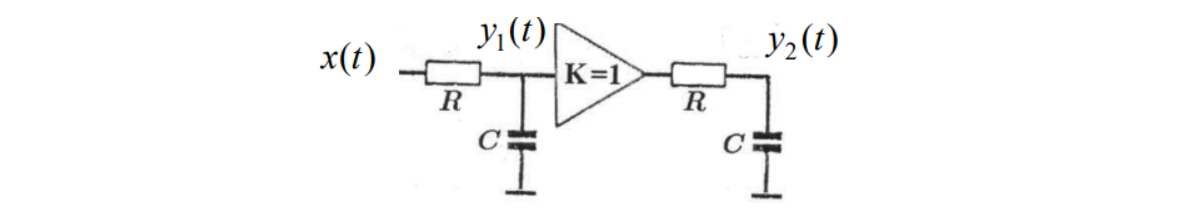
На рисунке между двумя  RC-цепочками  имеется  развязывающий повторитель, у которого большое входное и малое выходное сопротивление.  Это необходимо для устранения влияния цепочек друг на друга.

* Уравнение для одного RC-каскада:
$$RC\frac{dy}{dt}+{{y}_{1}}(t)=x(t)$$
Пусть ${{y}_{1}}(0)=0$. 

* Тогда преобразование Лапласа для него
$$RCp{{Y}_{1}}(p)+{{Y}_{1}}(p)=X(p)$$
* Передаточная функция
$${{H}_{1}}(p)=\frac{{{Y}_{1}}(p)}{X(p)}=\frac{1}{1+RCp}.$$

* Для двух последовательно соединенных RC-фильтров первого порядка
$${{H}_{2}}(p)={{H}_{1}}(p){{H}_{1}}(p)=\frac{1}{{{(RC)}^{2}}{{p}^{2}}+2RCp+1}.$$

Для аналогового фильтра импульсная характеристика может быть найдена с помощью обратного преобразования Лапласа для передаточной функции ${{H}_{a}}(p)$: 
$${{h}_{a}}(t)=\frac{1}{j2\pi }\oint\limits_{C}{{{H}_{a}}(p){{e}^{pt}}dp}, \qquad t\ge 0,$$
где контур $C$ охватывает все полюса подынтегральной функции. Для вычета в полюсе $m$-ого порядка воспользоваться формулой

$$\underset{{{z}_{p}}}{\mathop{\text{Res}}}\,\text{ }Y(z)=\frac{1}{(m-1)!}\text{ }\underset{z\to {{z}_{p}}}{\mathop{\lim }}\,\text{ }\frac{{{d}^{m-1}}}{d{{z}^{m-1}}}\left[ Y(z){{(z-{{z}_{p}})}^{m}} \right].$$

Дискретизовать импульсную характеристику по правилу  $h[k]=\Delta t\ {{h}_{a}}(k\Delta t)$ и с помощью $z$-преобразования найти передаточную функцию цифрового фильтра $H(z)$.

### Задача 3.2 Цифровая фильтрация реальных сигналов (творческая задача)

Выполнить фильтрацию `.wav` файла с помощью одного из цифровых фильтров, рассмотренных в первой и второй лабораторной работах. Проиллюстрировать, как в результате фильтрации изменился сигнал. Привести пример, для чего выбранный фильтр может быть применен. 

Для этой задачи `.wav` файл можно загрузить, например, с сайта [freesound.org](https://freesound.org/) или взять из предыдущих лабораторных работ.